In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot

In [307]:
df=pd.read_csv('data.csv')

In [308]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [310]:
df.drop(columns=['diagnosis'],inplace=True)

In [311]:
df.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [312]:
standard_matrix=df.to_numpy()
standard_matrix.shape

(569, 31)

In [313]:
#z-scaling
df_scaled = pd.DataFrame()

for column in df.columns:
    mean = df[column].mean()
    std = df[column].std()
    df_scaled[column] = (df[column] - mean) / std
    
df_scaled=pd.DataFrame(df_scaled)

In [314]:
df_scaled

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   -0.236197     1.096100     -2.071512        1.268817   0.983510   
1   -0.236196     1.828212     -0.353322        1.684473   1.907030   
2    0.431362     1.578499      0.455786        1.565126   1.557513   
3    0.431741    -0.768233      0.253509       -0.592166  -0.763792   
4    0.431821     1.748758     -1.150804        1.775011   1.824624   
..        ...          ...           ...             ...        ...   
564 -0.235524     2.109139      0.720838        2.058974   2.341795   
565 -0.235522     1.703356      2.083301        1.614511   1.722326   
566 -0.235520     0.701667      2.043775        0.672084   0.577445   
567 -0.235518     1.836725      2.334403        1.980781   1.733693   
568 -0.242193    -1.806811      1.220718       -1.812793  -1.346604   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           1.567087          3.280628        2.650542             2.530249   
1          -0.826235         -0.486643       -0.023825             0.547662   
2           0.941382          1.052000        1.362280             2.035440   
3           3.280667          3.399917        1.914213             1.450431   
4           0.280125          0.538866        1.369806             1.427237   
..               ...               ...             ...                  ...   
564         1.040926          0.218868        1.945573             2.318924   
565         0.102368         -0.017817        0.692434             1.262558   
566        -0.839745         -0.038646        0.046547             0.105684   
567         1.524426          3.269267        3.294046             2.656528   
568        -3.109349         -1.149741       -1.113893            -1.260710   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         2.215566  ...      1.885031      -1.358098         2.301575   
1         0.001391  ...      1.804340      -0.368879         1.533776   
2         0.938859  ...      1.510541      -0.023953         1.346291   
3         2.864862  ...     -0.281217       0.133866        -0.249720   
4        -0.009552  ...      1.297434      -1.465481         1.337363   
..             ...  ...           ...            ...              ...   
564      -0.312314  ...      1.899514       0.117596         1.751022   
565      -0.217473  ...      1.535369       2.045599         1.420690   
566      -0.808406  ...      0.560868       1.373645         0.578492   
567       2.135315  ...      1.959515       2.235958         2.301575   
568      -0.819349  ...     -1.409652       0.763518        -1.431475   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      1.999478          1.306537           2.614365         2.107672   
1      1.888827         -0.375282          -0.430066        -0.146620   
2      1.455004          0.526944           1.081980         0.854222   
3     -0.549538          3.391291           3.889975         1.987839   
4      1.219651          0.220362          -0.313119         0.612640   
..          ...               ...                ...              ...   
564    2.013529          0.378033          -0.273077         0.663928   
565    1.493644         -0.690623          -0.394473         0.236365   
566    0.427529         -0.808876           0.350427         0.326479   
567    1.651717          1.429169           3.901415         3.194794   
568   -1.074867         -1.857384          -1.206491        -1.304683   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                2.294058        2.748204                 1.935312  
1                1.086129       -0.243675                 0.280943  
2                1.953282        1.151242                 0.201214  
3                2.173873        6.040726                 4.930672  
4                0.728618       -0.867590                -0.396751  
..                    ...             ...

In [315]:
#covariance matrix
matrix = df_scaled.to_numpy()

In [316]:
matrix

array([[-0.23619734,  1.09609953, -2.0715123 , ...,  2.2940576 ,
         2.74820411,  1.93531174],
       [-0.23619562,  1.82821197, -0.35332152, ...,  1.08612862,
        -0.24367526,  0.28094279],
       [ 0.43136153,  1.5784992 ,  0.45578591, ...,  1.95328166,
         1.15124203,  0.20121416],
       ...,
       [-0.23552023,  0.70166686,  2.04377549, ...,  0.41370467,
        -1.10357792, -0.31812924],
       [-0.23551794,  1.83672491,  2.33440316, ...,  2.28797231,
         1.9173959 ,  2.21768395],
       [-0.24219276, -1.80681144,  1.22071793, ..., -1.7435287 ,
        -0.04809589, -0.75054629]])

In [317]:
transposed_matrix=matrix.T

In [318]:
transposed_matrix

array([[-0.23619734, -0.23619562,  0.43136153, ..., -0.23552023,
        -0.23551794, -0.24219276],
       [ 1.09609953,  1.82821197,  1.5784992 , ...,  0.70166686,
         1.83672491, -1.80681144],
       [-2.0715123 , -0.35332152,  0.45578591, ...,  2.04377549,
         2.33440316,  1.22071793],
       ...,
       [ 2.2940576 ,  1.08612862,  1.95328166, ...,  0.41370467,
         2.28797231, -1.7435287 ],
       [ 2.74820411, -0.24367526,  1.15124203, ..., -1.10357792,
         1.9173959 , -0.04809589],
       [ 1.93531174,  0.28094279,  0.20121416, ..., -0.31812924,
         2.21768395, -0.75054629]])

In [319]:
n=matrix.shape[0]

In [320]:
covariance_matrix=(np.dot(transposed_matrix,matrix))/(n-1)

In [321]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [322]:
covariance_matrix

array([[ 1.00000000e+00,  7.46264697e-02,  9.97698912e-02,
         7.31594119e-02,  9.68928233e-02, -1.29681975e-02,
         9.57011001e-05,  5.00799532e-02,  4.41580956e-02,
        -2.21140609e-02, -5.25114476e-02,  1.43047581e-01,
        -7.52619039e-03,  1.37331066e-01,  1.77741915e-01,
         9.67805739e-02,  3.39609721e-02,  5.52393174e-02,
         7.87680711e-02, -1.73062948e-02,  2.57253243e-02,
         8.24053373e-02,  6.47195454e-02,  7.99858731e-02,
         1.07186523e-01,  1.03380343e-02, -2.96809979e-03,
         2.32027439e-02,  3.51735794e-02, -4.42242529e-02,
        -2.98656360e-02],
       [ 7.46264697e-02,  1.00000000e+00,  3.23781891e-01,
         9.97855281e-01,  9.87357170e-01,  1.70581187e-01,
         5.06123578e-01,  6.76763550e-01,  8.22528522e-01,
         1.47741242e-01, -3.11630826e-01,  6.79090388e-01,
        -9.73174431e-02,  6.74171616e-01,  7.35863663e-01,
        -2.22600125e-01,  2.05999980e-01,  1.94203623e-01,
         3.76168956e-01, -1.04

In [323]:
covariance_matrix.shape

(31, 31)

In [324]:
eigenvalues

array([1.32880574e+01, 5.69680537e+00, 2.83539505e+00, 1.98135718e+00,
       1.64881531e+00, 1.23467271e+00, 9.78273239e-01, 6.71752969e-01,
       4.60792428e-01, 4.03133096e-01, 3.49154976e-01, 2.93890434e-01,
       2.61146925e-01, 2.41330214e-01, 1.56973649e-01, 9.41285258e-02,
       7.98099486e-02, 5.90462723e-02, 5.25911946e-02, 4.91219277e-02,
       3.10707842e-02, 2.99412056e-02, 2.74305238e-02, 2.42490222e-02,
       1.80393609e-02, 1.54797297e-02, 8.17169884e-03, 6.89810286e-03,
       1.33040206e-04, 7.48376054e-04, 1.58933755e-03])

In [325]:
eigenvectors

array([[-2.29121629e-02, -3.40684907e-02, -9.69384357e-02,
        -2.65980453e-02, -1.13275871e-02, -3.16733438e-01,
        -9.07115632e-01,  9.63624150e-02,  1.49115642e-01,
         1.69267515e-01, -5.81889971e-02, -6.72125159e-03,
         4.84108383e-03, -6.50009912e-03, -6.88594292e-03,
         2.75349185e-03, -7.77998301e-03,  1.97073716e-02,
        -5.44224782e-03,  2.04549082e-02,  9.87091673e-03,
        -6.19570677e-03, -3.19033693e-03,  1.02890273e-02,
        -4.23338835e-03, -1.32609967e-03, -2.57132397e-03,
         1.62387479e-03, -7.12258084e-05, -6.85226337e-04,
         1.89172407e-05],
       [-2.18913018e-01, -2.33271401e-01,  1.13937863e-02,
         4.21879503e-02,  3.81298606e-02,  2.95885214e-02,
         4.22987777e-02,  1.16427419e-01, -4.62708347e-02,
         2.24027044e-01,  7.94660810e-02, -4.22137877e-02,
        -5.06039273e-02, -1.24969877e-02,  5.90545533e-02,
        -5.07891563e-02,  1.50008977e-01, -2.09908003e-01,
         1.56773206e-01,  2.11

In [326]:
max_eigenval=np.max(eigenvalues)

In [327]:
max_eigenval

13.288057414153075

In [328]:
eigen_dict=dict(zip(eigenvalues,eigenvectors))
eigen_dict=dict(sorted(eigen_dict.items(),reverse=True))

In [329]:
eigen_dict

{13.288057414153075: array([-2.29121629e-02, -3.40684907e-02, -9.69384357e-02, -2.65980453e-02,
        -1.13275871e-02, -3.16733438e-01, -9.07115632e-01,  9.63624150e-02,
         1.49115642e-01,  1.69267515e-01, -5.81889971e-02, -6.72125159e-03,
         4.84108383e-03, -6.50009912e-03, -6.88594292e-03,  2.75349185e-03,
        -7.77998301e-03,  1.97073716e-02, -5.44224782e-03,  2.04549082e-02,
         9.87091673e-03, -6.19570677e-03, -3.19033693e-03,  1.02890273e-02,
        -4.23338835e-03, -1.32609967e-03, -2.57132397e-03,  1.62387479e-03,
        -7.12258084e-05, -6.85226337e-04,  1.89172407e-05]),
 5.696805368293615: array([-0.21891302, -0.2332714 ,  0.01139379,  0.04218795,  0.03812986,
         0.02958852,  0.04229878,  0.11642742, -0.04627083,  0.22402704,
         0.07946608, -0.04221379, -0.05060393, -0.01249699,  0.05905455,
        -0.05078916,  0.15000898, -0.209908  ,  0.15677321,  0.21182139,
         0.04600951, -0.07039439,  0.07302197,  0.09870432, -0.18366458,
   

In [330]:
top_10_eigenvectors = list(eigen_dict.values())[:10]

In [331]:
feature_matrix = np.array(top_10_eigenvectors).T

In [332]:
feature_matrix

array([[-2.29121629e-02, -2.18913018e-01, -1.03843884e-01,
        -2.27534912e-01, -2.21045775e-01, -1.42414707e-01,
        -2.39067299e-01, -2.58280254e-01, -2.60738114e-01,
        -1.37977741e-01],
       [-3.40684907e-02, -2.33271401e-01, -6.00441986e-02,
        -2.14589002e-01, -2.30668816e-01,  1.86422211e-01,
         1.52454726e-01,  6.05416253e-02, -3.41673916e-02,
         1.90684979e-01],
       [-9.69384357e-02,  1.13937863e-02, -6.68923422e-02,
         1.21247907e-02, -2.62931497e-02,  1.03182400e-01,
         7.47686230e-02, -1.75873594e-03,  2.75796069e-02,
         4.09620321e-02],
       [-2.65980453e-02,  4.21879503e-02, -6.02954308e-01,
         4.27527972e-02,  5.41147240e-02,  1.58098177e-01,
         3.18181168e-02,  1.94971242e-02,  6.57853527e-02,
         6.75025426e-02],
       [-1.13275871e-02,  3.81298606e-02, -4.90914502e-02,
         3.77155917e-02,  1.05622290e-02, -3.65750055e-01,
         1.17866372e-02,  8.65125060e-02, -4.36674117e-02,
        -3.

In [333]:
feature_matrix.shape

(31, 10)

In [334]:
final_matrix=feature_matrix.transpose() @ standard_matrix.transpose()
final_matrix=final_matrix.transpose()

In [335]:
final_matrix.shape

(569, 10)

In [336]:
top_10_eigenvectors
standard_matrix

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

pca 0


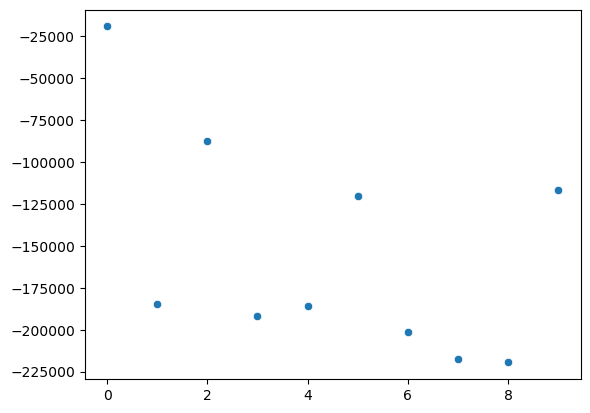

pca 1


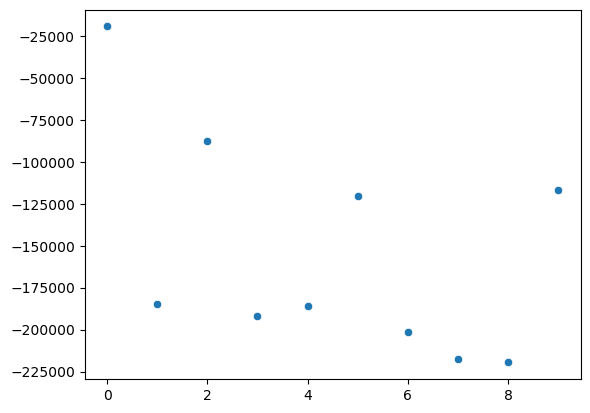

pca 2


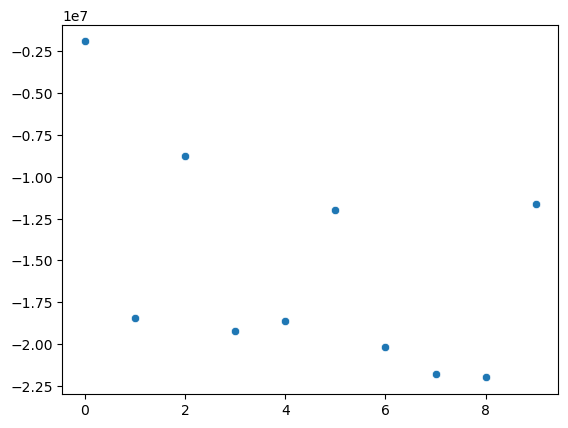

pca 3


pca 4


pca 5


pca 6


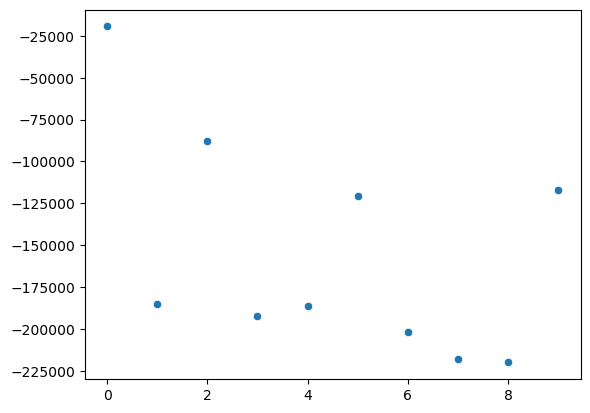

pca 7


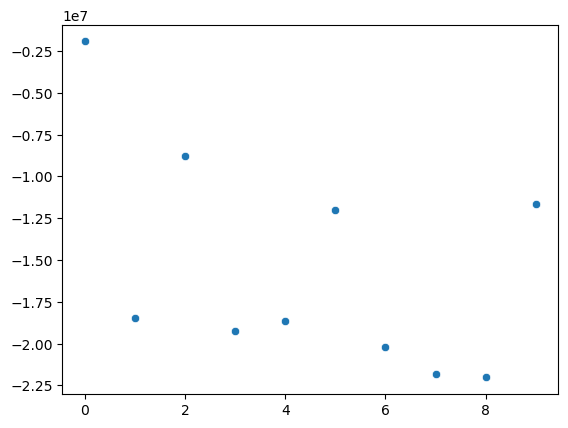

pca 8


pca 9


In [337]:
import seaborn as sns
for i in range(final_matrix.shape[1]):  
    sns.scatterplot(final_matrix[i])
    print(f'pca {i}')
    plt.show()  
